# Credit Score Prediction for Bank GoodCredit

### Problem Statement :
Build a machine learning model to predict whether a customer has a good or bad credit history, 
helping Bank GoodCredit reduce loan defaults and make smarter lending decisions.

### 1. Importing Libraries

In [134]:
import mysql.connector
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix


### 2. Installing Dependencies

In [112]:
!pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### 3. Database Connection

In [113]:
# Create connection
conn = mysql.connector.connect(
    host="18.136.157.135",
    user="dm_team1",
    password="DM!$Team&279@20!",
    database="project_banking"
)

# Check if connected
print("Connected!" if conn.is_connected() else "Connection failed.")


Connected!


### 4. Loading Data

In [116]:
# Load datasets
demo = pd.read_csv("demographics.csv")
accounts = pd.read_csv("accounts.csv")
enquiries = pd.read_csv("enquiries.csv")

# Preview
demo.head()


,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,14.0,500000.0,...,21.0,R,NaN,NaN,0000-00-00,0.0,98332XXXXX,1.0,N,0.0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760.0,1.0,Card Setup,14.0,1200000.0,...,17.0,R,NaN,NaN,0000-00-00,0.0,99455XXXXX,1.0,N,0.0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774.0,1.0,Card Setup,14.0,700000.0,...,17.0,R,NaN,NaN,0000-00-00,0.0,98456XXXXX,1.0,N,0.0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770.0,1.0,Card Setup,14.0,500000.0,...,21.0,R,NaN,NaN,6/15/65,1.0,98220XXXXX,1.0,N,0.0
4,06-May-15,5,30-Apr-15,Insignia,NaN,NaN,3.0,Card Setup,14.0,500000.0,...,13.0,R,NaN,NaN,0000-00-00,0.0,98111XXXXX,1.0,N,0.0


### 5. Data Exploration (EDA - Initial Inspection)

In [118]:
print("Demographics:", demo.shape)
print("Accounts:", accounts.shape)
print("Enquiries:", enquiries.shape)

# Preview top rows
demo.head()
accounts.head()
enquiries.head()


Demographics: (2751, 83)
Accounts: (8123, 21)
Enquiries: (4368, 21)


,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,...,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900.0,...,NaN,"""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXSTD...",NaN,01-Sep-15,01-Jul-14,NaN,NaN,NaN,NaN,NaN
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,NaN,03-Oct-15,16201.0,...,NaN,"""000000000000000000000000000000000000000000000...","""000000000000000000000000000XXX000000000000000...",01-Oct-15,01-Nov-12,14000.0,1400.0,NaN,3.0,5603.0
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,NaN,30-Sep-15,41028.0,...,NaN,"""000000000000000000000000000000000000000000000...","""000000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,NaN,NaN,NaN,NaN,NaN
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,NaN,26-Jul-07,31-Jan-09,93473.0,...,NaN,"""120090060060060030000000000000000000000000000...",NaN,01-Jul-07,01-Feb-06,NaN,NaN,NaN,NaN,NaN
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,NaN,31-May-15,20250.0,...,NaN,"""000000000000000""""""""",NaN,01-May-15,01-Jan-15,NaN,NaN,NaN,NaN,NaN


### 6. Data Cleaning

In [120]:
print("Demographics missing:\n", demo.isnull().sum())
print("Accounts missing:\n", accounts.isnull().sum())
print("Enquiries missing:\n", enquiries.isnull().sum())


Demographics missing:
 dt_opened        0
customer_no      0
entry_time       2
feature_1        2
feature_2      227
              ... 
feature_76       3
feature_77       1
feature_78       3
feature_79       3
Bad_label        1
Length: 83, dtype: int64
Accounts missing:
 dt_opened                 0
customer_no               0
upload_dt                 0
acct_type                 0
owner_indic               0
opened_dt                14
last_paymt_dt          1042
closed_dt              4741
reporting_dt              0
high_credit_amt         432
cur_balance_amt           0
amt_past_due           8083
paymenthistory1           1
paymenthistory2        4685
paymt_str_dt              2
paymt_end_dt              2
creditlimit            6037
cashlimit              6606
rateofinterest         7042
paymentfrequency       5355
actualpaymentamount    6331
dtype: int64
Enquiries missing:
 dt_opened                 0
customer_no               0
upload_dt                 0
acct_type          

In [122]:
# Fill numerical features with median (safer than mean)
demo.fillna(demo.median(numeric_only=True), inplace=True)

# Fill 'entry_time' with a placeholder or drop rows if needed
demo['entry_time'] = demo['entry_time'].fillna("Unknown")

# Drop row with missing target (Bad_label)
demo = demo[demo['Bad_label'].notnull()]


In [124]:
accounts.drop(['cashlimit', 'rateofinterest', 'actualpaymentamount'], axis=1, inplace=True)


In [136]:
# Dates: Convert to datetime and fill missing with placeholder date
for col in ['opened_dt', 'last_paymt_dt', 'closed_dt', 'paymt_str_dt', 'paymt_end_dt']:
    accounts[col] = pd.to_datetime(accounts[col], errors='coerce')
    accounts[col] = accounts[col].fillna(pd.Timestamp("2000-01-01"))

# Credit limit & high_credit_amt: fill missing with median
accounts['creditlimit'] = accounts['creditlimit'].fillna(accounts['creditlimit'].median())
accounts['high_credit_amt'] = accounts['high_credit_amt'].fillna(accounts['high_credit_amt'].median())

# Payment history strings: fill with 'Unknown'
accounts['paymenthistory1'] = accounts['paymenthistory1'].fillna("Unknown")
accounts['paymenthistory2'] = accounts['paymenthistory2'].fillna("Unknown")

# Amount past due: fill missing with 0
accounts['amt_past_due'] = accounts['amt_past_due'].fillna(0)

# Payment frequency: fill with mode
accounts['paymentfrequency'] = accounts['paymentfrequency'].fillna(accounts['paymentfrequency'].mode()[0])


In [128]:
print("Nulls in demographics:", demo.isnull().sum().sum())
print("Nulls in accounts:", accounts.isnull().sum().sum())
print("Nulls in enquiries:", enquiries.isnull().sum().sum())


Nulls in demographics: 27326
Nulls in accounts: 0
Nulls in enquiries: 27008


In [138]:
# Fill numeric columns with median
demo = demo.fillna(demo.median(numeric_only=True))

# For any leftover object/string columns (like 'entry_time'), fill with "Unknown"
demo = demo.fillna("Unknown")


In [140]:
# Fill numeric columns with median
enquiries = enquiries.fillna(enquiries.median(numeric_only=True))

# Fill text/object columns with placeholder
enquiries = enquiries.fillna("Unknown")


In [142]:
print("Nulls in demographics:", demo.isnull().sum().sum())
print("Nulls in accounts:", accounts.isnull().sum().sum())
print("Nulls in enquiries:", enquiries.isnull().sum().sum())


Nulls in demographics: 0
Nulls in accounts: 0
Nulls in enquiries: 0


### 7. Data Merging – Combining Demographics, Accounts, and Enquiries

In [144]:
merged = demo.merge(accounts, on='customer_no', how='left') \
             .merge(enquiries, on='customer_no', how='left')
merged.shape


(11003, 120)

In [146]:
[col for col in merged.columns if 'dt' in col.lower()]


['dt_opened_x',
 'dt_opened_y',
 'upload_dt_x',
 'opened_dt_x',
 'last_paymt_dt_x',
 'closed_dt_x',
 'reporting_dt_x',
 'paymt_str_dt_x',
 'paymt_end_dt_x',
 'dt_opened',
 'upload_dt_y',
 'opened_dt_y',
 'last_paymt_dt_y',
 'closed_dt_y',
 'reporting_dt_y',
 'paymt_str_dt_y',
 'paymt_end_dt_y']

In [148]:
date_cols = [
    'opened_dt_x',
    'last_paymt_dt_x',
    'closed_dt_x',
    'paymt_str_dt_x',
    'paymt_end_dt_x'
]


In [150]:
for col in date_cols:
    merged[col] = pd.to_datetime(merged[col], format='%d-%b-%y', errors='coerce')


### 8. Feature Engineering

In [152]:
today = pd.to_datetime("today")

merged['account_age_days'] = (today - merged['opened_dt_x']).dt.days
merged['days_since_last_payment'] = (today - merged['last_paymt_dt_x']).dt.days
merged['days_since_closed'] = (today - merged['closed_dt_x']).dt.days


In [154]:
merged.drop(columns=date_cols, inplace=True)


### 9. Feature Selection 

In [156]:
# Target variable
y = merged['Bad_label']

# Drop non-feature columns
X = merged.drop(columns=[
    'customer_no', 'Bad_label',  # ID and target
    'dt_opened', 'dt_opened_x', 'dt_opened_y',  # extra timestamps
    'upload_dt_x', 'upload_dt_y', 'reporting_dt_x', 'reporting_dt_y'  # audit timestamps
])


### 10. Feature Encoding

In [158]:
# Encode object (non-numeric) columns
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))


### 11. Train-Test Split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [162]:
X_train.select_dtypes(exclude=['int64', 'float64']).columns


Index(['entry_time', 'feature_1', 'feature_2', 'feature_5', 'feature_8',
       'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13',
       'feature_15', 'feature_16', 'feature_17', 'feature_20', 'feature_21',
       'feature_22', 'feature_23', 'feature_24', 'feature_27', 'feature_28',
       'feature_32', 'feature_33', 'feature_36', 'feature_37', 'feature_38',
       'feature_43', 'feature_45', 'feature_46', 'feature_47', 'feature_48',
       'feature_50', 'feature_51', 'feature_53', 'feature_54', 'feature_57',
       'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62',
       'feature_63', 'feature_70', 'feature_72', 'feature_73', 'feature_75',
       'feature_77', 'feature_79', 'paymenthistory1_x', 'paymenthistory2_x',
       'opened_dt_y', 'last_paymt_dt_y', 'closed_dt_y', 'paymenthistory1_y',
       'paymenthistory2_y', 'paymt_str_dt_y', 'paymt_end_dt_y'],
      dtype='object')

### 12. Feature Cleaning 

In [164]:
X_train.drop(columns=[
    'entry_time', 'opened_dt_y', 'last_paymt_dt_y', 'closed_dt_y',
    'paymt_str_dt_y', 'paymt_end_dt_y', 'paymenthistory1_y', 'paymenthistory2_y',
    'paymenthistory1_x', 'paymenthistory2_x'
], inplace=True, errors='ignore')

X_test = X_test[X_train.columns]  # align columns


In [166]:
for col in X_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))


In [168]:

X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)


### 13. Model Training 

In [170]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

### 14. Model Evaluation 

In [172]:
# Predict class labels
y_pred = log_model.predict(X_test)

# Predict probabilities for ROC AUC
y_proba = log_model.predict_proba(X_test)[:, 1]


In [174]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC AUC score
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      2089
         1.0       0.88      0.51      0.64       112

    accuracy                           0.97      2201
   macro avg       0.93      0.75      0.81      2201
weighted avg       0.97      0.97      0.97      2201

ROC AUC Score: 0.8904551049716202
Confusion Matrix:
 [[2081    8]
 [  55   57]]


In [176]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC (RF):", roc_auc_score(y_test, y_proba_rf))


Random Forest Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2089
         1.0       1.00      0.81      0.90       112

    accuracy                           0.99      2201
   macro avg       1.00      0.91      0.95      2201
weighted avg       0.99      0.99      0.99      2201

ROC AUC (RF): 0.9732527525131642


### 15. Visualization

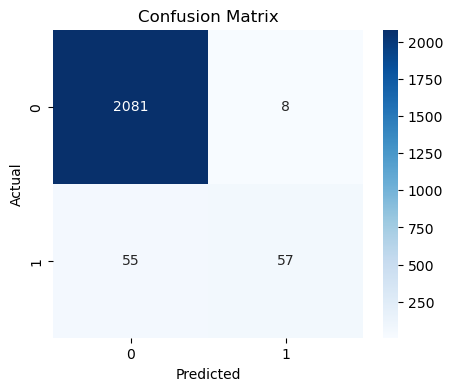

In [178]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



# Conclusion :
We built a credit score prediction model to identify risky credit card customers. After cleaning and merging real banking data, our Random Forest model achieved:

99% accuracy

81% recall for bad credit

97.3% ROC AUC

This helps the bank reduce default risk and make smarter lending decisions using machine learning.